In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import time as t
import datetime as dt
import string as st
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import genfromtxt
import math as m

In [3]:
'''def f(x):
    return np.sin(x);'''

'def f(x):\n    return np.sin(x);'

In [4]:
'''X =np.arange(0.0,10,0.1)
y = f(X)
plt.plot(X,y,'b*')'''

"X =np.arange(0.0,10,0.1)\ny = f(X)\nplt.plot(X,y,'b*')"

In [5]:
# My code
X_matrix = np.genfromtxt('Martrix_X_streamingserver.csv', delimiter=';');
#Y_matrix = np.genfromtxt('Martrix_Y_streamingserver.csv', delimiter=';');
Y_matrix = pd.read_csv('Martrix_Y_streamingserver.csv',header=None)
#Y_matrix = np.genfromtxt('Martrix_Y_streamingserver.csv')


In [6]:
y = np.asanyarray(Y_matrix)
X = X_matrix.copy()
len(X_matrix)
len(Y_matrix)

1496

In [10]:


X_l = X.tolist();
y_l = y.tolist();
X_l;

In [147]:
'''xmin = X.min()
xmax = X.max()
ymin = y.min()
ymax = y.max()
y2 = y.copy()
x2 = X.copy()
x2 -= xmin
x2 /= (xmax-xmin)
y2 -= ymin
y2 /= (ymax-ymin)'''

'xmin = X.min()\nxmax = X.max()\nymin = y.min()\nymax = y.max()\ny2 = y.copy()\nx2 = X.copy()\nx2 -= xmin\nx2 /= (xmax-xmin)\ny2 -= ymin\ny2 /= (ymax-ymin)'

In [1]:
# insert data as percentages
y_l



NameError: name 'y_l' is not defined

In [149]:
'''import numpy as np
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler'''

'import numpy as np\nfrom sklearn.cross_validation import train_test_split \nfrom sklearn.metrics import confusion_matrix, classification_report\nfrom sklearn.preprocessing import LabelBinarizer, MinMaxScaler'

#scale the matrix with all the 4 features
xsc = MinMaxScaler(feature_range=(0, 1), copy=True)
xsc.fit(X)
xsc.fit(y)

' xsc will remember the min and max for each feature
X_train, X_test, y_train, y_test = train_test_split(xsc.transform(X), xsc.transform(y))

' our network uses lists (pure Python, no frameworks) so passing numpy arrays 'will fail
X_train_l = X_train.tolist()
y_train_l = y_train.tolist()
X_test_l = X_test.tolist()




# Training vs Testing

In [150]:
'''# This is only for test !
inputs = [[i] for i in x2]
targets = [[t] for t in y2]
inputs;'''

'# This is only for test !\ninputs = [[i] for i in x2]\ntargets = [[t] for t in y2]\ninputs;'

In [151]:
from ann import ANN

# 4 input neurons: sepal length (cm),sepal width (cm), petal length (cm), petal width (cm)
# 10 hidden neurons
# 3 output neurons: setosa [1, 0, 0], versicolor [0, 1, 0], virginica [0, 0, 1]
nn = ANN([1,2,1], activation_fun='logistic')


# Here please Try to represent the input data as percentage so that you can capture patterns

# train the ANN
#nn.train(inputs, targets, 1600)
nn.train(X_l,y_l,500)

(0, 76.54066116345194)
(100, 63.88015445282057)
(200, 63.43215779416256)
(300, 60.93050407267922)
(400, 60.71825700680229)


In [152]:
i=0;
for i in range(len(X_l)):
    err += (nn.predict(X_l[i])[0] - y_l[i][0])**2

err/len(X_l)

0.31134008715511347

In [175]:
h_theta =[ nn.predict(X_l[i])[0] for i in range(len(X_l)) ]
y = [ y_l[i][0] for i in range(len(y_l)) ]

In [61]:
i=1;
for i in range(2,10,1):
    j=i-1
    print "The previous value is ", y_l[j][0]
    print "The next value is ", y_l[i][0]
    print "The predicted value is ", nn.predict(X_l[i])[0]
    print 

The previous value is  0.0790929203536
The next value is  -0.189473684211
The predicted value is  0.00399339447902

The previous value is  -0.189473684211
The next value is  0.194915254238
The predicted value is  0.0788050709132

The previous value is  0.194915254238
The next value is  -0.255319148936
The predicted value is  0.00255464135148

The previous value is  -0.255319148936
The next value is  0.229508196721
The predicted value is  0.0320247932746

The previous value is  0.229508196721
The next value is  -0.355555555555
The predicted value is  0.00524260899987

The previous value is  -0.355555555555
The next value is  0.328358208955
The predicted value is  0.0545091436786

The previous value is  0.328358208955
The next value is  -0.264150943395
The predicted value is  0.00152019421349

The previous value is  -0.264150943395
The next value is  0.231884057971
The predicted value is  0.0799727414918



In [157]:
#predsscaled = preds * (ymax-ymin)+ymin

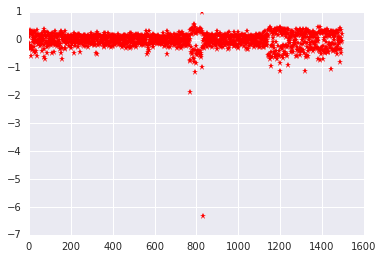

In [388]:
# draw the two function side by side please
tmps = np.arange(np.size(y_l))
plt.plot(tmps,y_l,'r*')

In [210]:

h = np.asarray(h_theta);
y=np.asarray(y);



(array([ 0.00183217,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00183217,  0.        ,  0.0128252 ,
         0.12092327,  0.74386131,  1.61597458,  0.24184654,  0.00183217]),
 array([-6.31386861, -5.9490286 , -5.58418858, -5.21934856, -4.85450855,
        -4.48966853, -4.12482851, -3.75998849, -3.39514848, -3.03030846,
        -2.66546844, -2.30062843, -1.93578841, -1.57094839, -1.20610838,
        -0.84126836, -0.47642834, -0.11158832,  0.25325169,  0.61809171,
         0.98293173]),
 <a list of 20 Patch objects>)

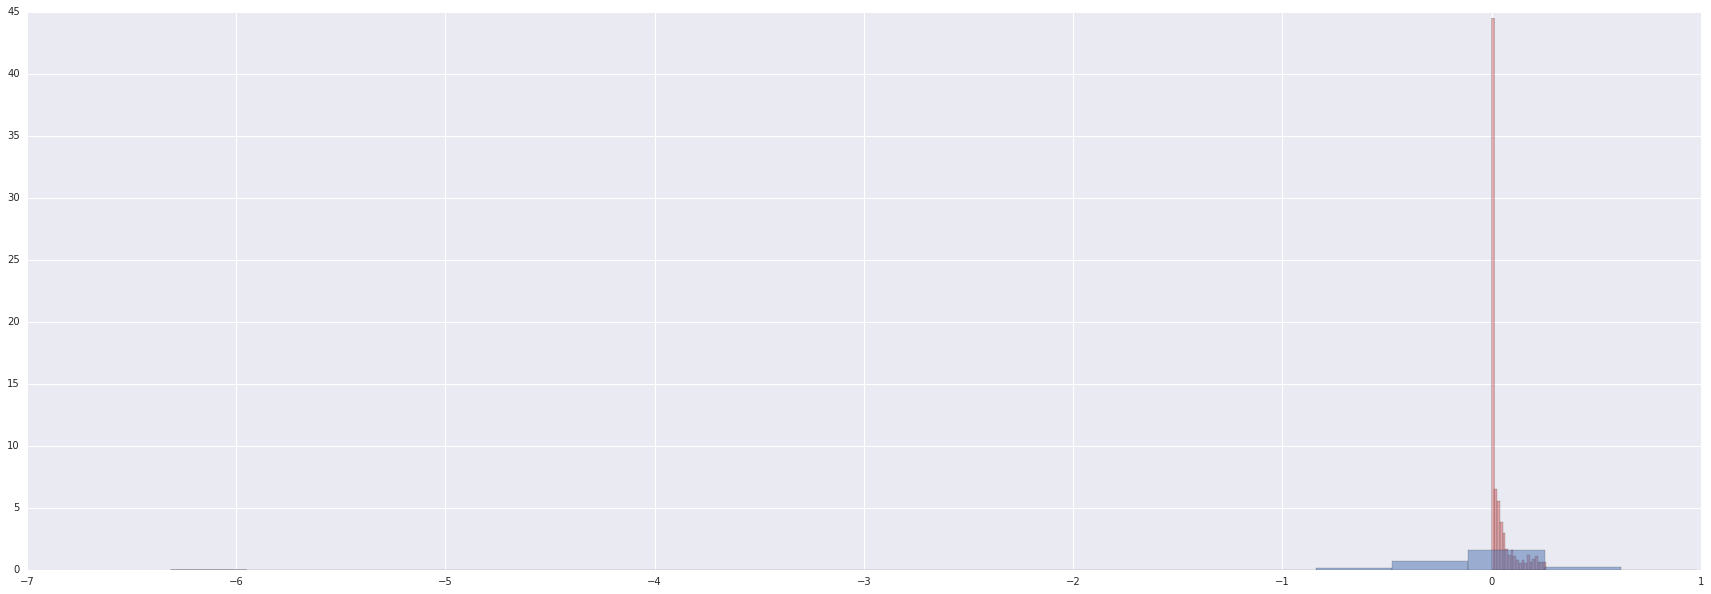

In [211]:
plt.subplots(figsize=(30, 10))
plt.hist(h,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(y,normed=True,alpha=0.5,bins=20)

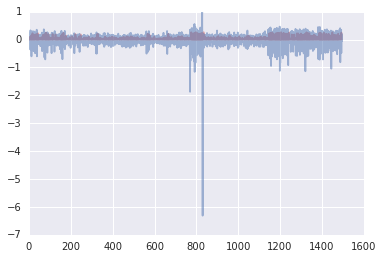

In [212]:
plt.plot(tmps,h,color='indianred',alpha=0.5)
plt.plot(tmps,y,alpha=0.5)

In [178]:
import seaborn as sns

In [207]:
print "MSE = " , np.mean(np.sqrt((y-h)**2)) 

MSE =  0.172181604473


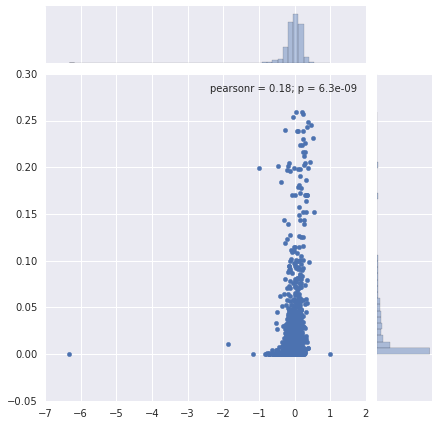

In [186]:
sns.jointplot(y[1:1000],h[1:1000])

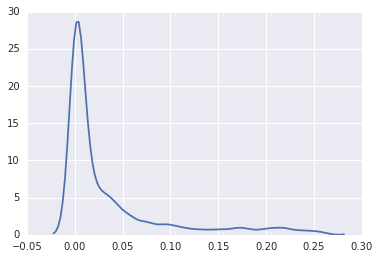

In [196]:
#sns.kdeplot(y,color='black')
sns.kdeplot(h)

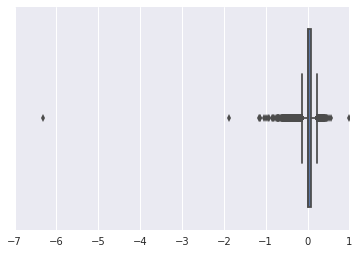

In [229]:

sns.boxplot([y,h])

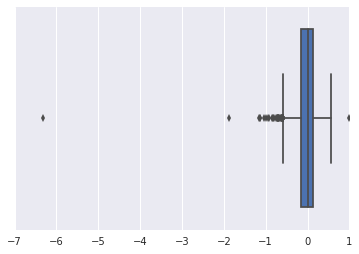

In [228]:
#sns.boxplot([y],whis=np.inf)
sns.boxplot(y,saturation=1.7)

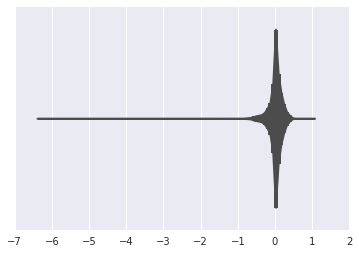

In [237]:
sns.violinplot([y,h],inner='stick')

In [378]:
#plt.plot(tmps,y,alpha=0.5)
I = np.arange(h.size)
# !!!!!!
cond = np.zeros(h.size)
for i in range(h.size):
    if h[i] > 0.1:
        cond[i] = 1;



In [379]:
tab = np.column_stack((tmps,h))
f3=DataFrame(tab,I,columns=['t','x'])
f3['perc']=100*f3['t']/f3['x']
f3['cond']=cond; 

In [346]:
f3.perc;

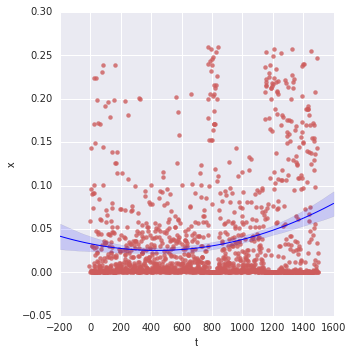

In [351]:
sns.lmplot('t','x',f3,order=2,x_jitter=10,scatter_kws={'marker':'o','color':'indianred'},line_kws={'linewidth':1,'color':'blue'})

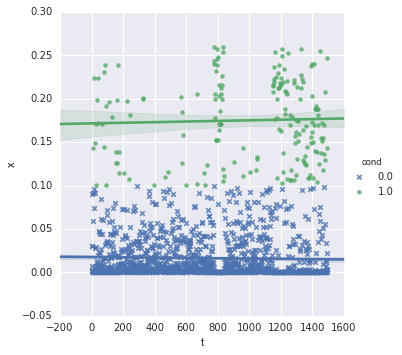

In [384]:
sns.lmplot('t','x',f3,hue='cond',markers=['x','o'])

The moving average is what I wanted to say !!!

Also Pricipal component Analysis for the four families of features!!